# Import libraries

Import numpy and pandas

In [1]:
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

print('Libraries imported.')

Libraries imported.


Import geopy forconvert an address into latitude and longitude values

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

Install folium - map rendering library

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
print('Libraries imported.')

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/lin

Install other libraries

In [5]:
import requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


# Load data

Load data (London boroughs with coordinates- CSV file) from internet resource

In [6]:
df_areas = pd.read_csv('https://www.doogal.co.uk/AdministrativeAreasCSV.ashx')
df_areas.head()

District       County District Code   Latitude  Longitude  Postcodes  \
0  Aberdeen City          NaN     S12000033  57.149502  -2.132830      14263   
1  Aberdeenshire          NaN     S12000034  57.354000  -2.322540      21387   
2           Adur  West Sussex     E07000223  50.833302  -0.283957       2930   
3      Allerdale      Cumbria     E07000026  54.713299  -3.361400       5490   
4   Amber Valley   Derbyshire     E07000032  53.037601  -1.424410       4921   

   Active Postcodes  Households  Population  
0              6190      103302      222599  
1              9689      104594      252588  
2              1715       26952       61167  
3              4059       42364       96471  
4              2780       52602      122335

Load data (London average house prices - CSV file) from internet resource

In [7]:
df_prices = pd.read_csv('http://publicdata.landregistry.gov.uk/market-trend-data/house-price-index-data/Average-prices-2019-04.csv')
df_prices.head()

Date           Region_Name  Area_Code  Average_Price  Monthly_Change  \
0  1968-04-01               England  E92000001    3408.108064             0.0   
1  1968-04-01              Scotland  S92000003    2844.980688             0.0   
2  1968-04-01      Northern Ireland  N92000001    3661.485500             0.0   
3  1968-04-01                 Wales  W92000004    2885.414162             0.0   
4  1968-04-01  West Midlands Region  E12000005    3328.858802             0.0   

   Annual_Change  Average_Price_SA  
0            NaN               NaN  
1            NaN               NaN  
2            NaN               NaN  
3            NaN               NaN  
4            NaN               NaN

# Transform data

In [8]:
# filter columns
columns_filtered= ['District Code', 'District', 'County', 'Latitude', 'Longitude']  
uk_boroughs = df_areas.loc[:, columns_filtered]

uk_boroughs.head()

District Code       District       County   Latitude  Longitude
0     S12000033  Aberdeen City          NaN  57.149502  -2.132830
1     S12000034  Aberdeenshire          NaN  57.354000  -2.322540
2     E07000223           Adur  West Sussex  50.833302  -0.283957
3     E07000026      Allerdale      Cumbria  54.713299  -3.361400
4     E07000032   Amber Valley   Derbyshire  53.037601  -1.424410

Rename columns

In [9]:
uk_boroughs.rename(columns={'District': 'Borough'}, inplace=True)
uk_boroughs.head()

District Code        Borough       County   Latitude  Longitude
0     S12000033  Aberdeen City          NaN  57.149502  -2.132830
1     S12000034  Aberdeenshire          NaN  57.354000  -2.322540
2     E07000223           Adur  West Sussex  50.833302  -0.283957
3     E07000026      Allerdale      Cumbria  54.713299  -3.361400
4     E07000032   Amber Valley   Derbyshire  53.037601  -1.424410

Select London boroughs

In [10]:
london_boroughs = uk_boroughs[uk_boroughs['County'].isin(['Greater London', 'City of London'])].reset_index(drop=True)
london_boroughs

District Code                 Borough          County   Latitude  Longitude
0      E09000002    Barking and Dagenham  Greater London  51.546501   0.125051
1      E09000003                  Barnet  Greater London  51.605598  -0.207649
2      E09000004                  Bexley  Greater London  51.459202   0.136265
3      E09000005                   Brent  Greater London  51.551800  -0.257490
4      E09000006                 Bromley  Greater London  51.391800   0.026386
5      E09000007                  Camden  Greater London  51.534302  -0.143282
6      E09000001          City of London  City of London  51.514301  -0.091442
7      E09000008                 Croydon  Greater London  51.368198  -0.096448
8      E09000009                  Ealing  Greater London  51.518002  -0.325004
9      E09000010                 Enfield  Greater London  51.639900  -0.082636
10     E09000011               Greenwich  Greater London  51.476601   0.051824
11     E09000012                 Hackney  Greater London  51.549599  -0.069849
12     E09000013  Hammersmith and Fulham  Greater London  51.492100  -0.216492
13     E09000014                Haringey  Greater London  51.589699  -0.105783
14     E09000015                  Harrow  Greater London  51.591801  -0.338094
15     E09000016                Havering  Greater London  51.570999   0.203626
16     E09000017              Hillingdon  Greater London  51.537800  -0.438400
17     E09000018                Hounslow  Greater London  51.471401  -0.347104
18     E09000019               Islington  Greater London  51.539001  -0.108697
19     E09000020  Kensington and Chelsea  Greater London  51.498501  -0.187347
20     E09000021    Kingston upon Thames  Greater London  51.397900  -0.287269
21     E09000022                 Lambeth  Greater London  51.457699  -0.120317
22     E09000023                Lewisham  Greater London  51.452599  -0.024825
23     E09000024                  Merton  Greater London  51.411098  -0.196242
24     E09000025                  Newham  Greater London  51.531300   0.030927
25     E09000026               Redbridge  Greater London  51.579300   0.066536
26     E09000027    Richmond upon Thames  Greater London  51.449001  -0.317008
27     E09000028               Southwark  Greater London  51.483601  -0.078522
28     E09000029                  Sutton  Greater London  51.364201  -0.181904
29     E09000030           Tower Hamlets  Greater London  51.517799  -0.043724
30     E09000031          Waltham Forest  Greater London  51.588001  -0.009436
31     E09000032              Wandsworth  Greater London  51.455799  -0.176848
32     E09000033             Westminster  Greater London  51.513199  -0.148674

Select last prices in df_prices

In [11]:
df_lastprice = df_prices[df_prices['Date'] == df_prices.Date[len(df_prices)-1]]
df_lastprice.head()

Date       Region_Name  Area_Code  Average_Price  \
126756  2019-04-01          Scotland  S92000003    150825.2477   
126757  2019-04-01  Northern Ireland  N92000001    134811.1675   
126758  2019-04-01             Wales  W92000004    163901.8582   
126759  2019-04-01           England  E92000001    245128.4366   
126760  2019-04-01      Outer London  E13000002    419777.0751   

        Monthly_Change  Annual_Change  Average_Price_SA  
126756        0.748378       1.615960       150174.7111  
126757       -1.004798       3.468742               NaN  
126758        2.403834       6.725299       163066.1501  
126759        0.667593       1.127219       244183.5189  
126760       -0.114699      -1.117197               NaN

Grab only london house prices (Area_Code starts with 'E090000')

In [12]:
london_prices = df_lastprice[df_lastprice['Area_Code'].str.contains('E090000')]
london_prices.head()

Date             Region_Name  Area_Code  Average_Price  \
126836  2019-04-01                Havering  E09000016   3.577700e+05   
126837  2019-04-01              Hillingdon  E09000017   4.103858e+05   
126838  2019-04-01                Hounslow  E09000018   3.981704e+05   
126839  2019-04-01               Islington  E09000019   6.137179e+05   
126840  2019-04-01  Kensington And Chelsea  E09000020   1.288685e+06   

        Monthly_Change  Annual_Change  Average_Price_SA  
126836       -0.060313      -3.061632               NaN  
126837       -0.008691       0.432583               NaN  
126838        0.638486       2.721548               NaN  
126839       -2.383555      -3.717163               NaN  
126840        6.249938      -2.746675               NaN

Merge dataframes with boroughs data and prices data

In [13]:
london_merged = london_boroughs

# merge london_data with df_filter to add price for each borough
london_merged = london_merged.join(london_prices.set_index('Area_Code'), on='District Code')

london_merged.head() # check the last columns!

District Code               Borough          County   Latitude  Longitude  \
0     E09000002  Barking and Dagenham  Greater London  51.546501   0.125051   
1     E09000003                Barnet  Greater London  51.605598  -0.207649   
2     E09000004                Bexley  Greater London  51.459202   0.136265   
3     E09000005                 Brent  Greater London  51.551800  -0.257490   
4     E09000006               Bromley  Greater London  51.391800   0.026386   

         Date           Region_Name  Average_Price  Monthly_Change  \
0  2019-04-01  Barking and Dagenham    299028.7074        0.895216   
1  2019-04-01                Barnet    516750.1635        0.397198   
2  2019-04-01                Bexley    333317.2861       -0.495829   
3  2019-04-01                 Brent    474540.4375        0.790500   
4  2019-04-01               Bromley    430242.4197       -1.314419   

   Annual_Change  Average_Price_SA  
0       2.694129               NaN  
1      -4.570999               NaN  
2      -1.524214               NaN  
3      -2.244067               NaN  
4      -2.408073               NaN

In [14]:
# filter columns
columns_filtered= ['Borough', 'Latitude', 'Longitude','Average_Price']  
london_data  = london_merged.loc[:, columns_filtered]
london_data.head()

Borough   Latitude  Longitude  Average_Price
0  Barking and Dagenham  51.546501   0.125051    299028.7074
1                Barnet  51.605598  -0.207649    516750.1635
2                Bexley  51.459202   0.136265    333317.2861
3                 Brent  51.551800  -0.257490    474540.4375
4               Bromley  51.391800   0.026386    430242.4197

Use geopy library to get the latitude and longitude values of London

In [15]:
address = 'London'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [16]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(london_data['Latitude'], london_data['Longitude'], london_data['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

# Analyze data

In [17]:
# @hidden_cell
CLIENT_ID = 'BQHQ55X0ZZNSZ1YAL4LOAGV544HDXN4HPQOJYEWW4SL1HFQC' # your Foursquare ID
CLIENT_SECRET = 'MZHRE3PGIBNMAZ5XSZ34AJNGH1KCMMZUN2EYSJDF1SZIGG1I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Explore Boroughs in London

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each borough and create a new dataframe called df_venues.

In [19]:
# limit of number of venues returned by Foursquare API
LIMIT = 100
radius = 2000 # define radius
df_venues = getNearbyVenues(names=london_data['Borough'],
                                   latitudes=london_data['Latitude'],
                                   longitudes=london_data['Longitude'],
                                   radius = radius)

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
City of London
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [20]:
print(df_venues.shape)
df_venues.head()

(2875, 7)


Borough  Borough Latitude  Borough Longitude            Venue  \
0  Barking and Dagenham         51.546501           0.125051    Capital Karts   
1  Barking and Dagenham         51.546501           0.125051  Mayesbrook Park   
2  Barking and Dagenham         51.546501           0.125051       Co-op Food   
3  Barking and Dagenham         51.546501           0.125051              Vue   
4  Barking and Dagenham         51.546501           0.125051             Lidl   

   Venue Latitude  Venue Longitude Venue Category  
0       51.531792         0.118739  Go Kart Track  
1       51.549842         0.108544           Park  
2       51.540093         0.127522  Grocery Store  
3       51.532149         0.135000  Movie Theater  
4       51.551934         0.112965    Supermarket

In [21]:
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 278 uniques categories.


In [22]:
london_venues = df_venues
london_venues.groupby('Borough').count().sort_values('Venue', ascending= True)

Borough Latitude  Borough Longitude  Venue  \
Borough                                                              
Hillingdon                            25                 25     25   
Barking and Dagenham                  39                 39     39   
Redbridge                             43                 43     43   
Barnet                                59                 59     59   
Greenwich                             64                 64     64   
Bexley                                67                 67     67   
Bromley                               71                 71     71   
Sutton                                75                 75     75   
Harrow                                77                 77     77   
Newham                                78                 78     78   
Enfield                               83                 83     83   
Waltham Forest                        96                 96     96   
Hounslow                              98                 98     98   
Haringey                             100                100    100   
Brent                                100                100    100   
Tower Hamlets                        100                100    100   
Camden                               100                100    100   
Southwark                            100                100    100   
Richmond upon Thames                 100                100    100   
City of London                       100                100    100   
Croydon                              100                100    100   
Merton                               100                100    100   
Lewisham                             100                100    100   
Lambeth                              100                100    100   
Kingston upon Thames                 100                100    100   
Kensington and Chelsea               100                100    100   
Islington                            100                100    100   
Ealing                               100                100    100   
Wandsworth                           100                100    100   
Havering                             100                100    100   
Hackney                              100                100    100   
Hammersmith and Fulham               100                100    100   
Westminster                          100                100    100   

                        Venue Latitude  Venue Longitude  Venue Category  
Borough                                                                  
Hillingdon                          25               25              25  
Barking and Dagenham                39               39              39  
Redbridge                           43               43              43  
Barnet                              59               59              59  
Greenwich                           64               64              64  
Bexley                              67               67              67  
Bromley                             71               71              71  
Sutton                              75               75              75  
Harrow                              77               77              77  
Newham                              78               78              78  
Enfield                             83               83              83  
Waltham Forest                      96               96              96  
Hounslow                            98               98              98  
Haringey                           100              100             100  
Brent                              100              100             100  
Tower Hamlets                      100              100             100  
Camden                             100              100             100  
Southwark                          100              100             100  
Richmond upon Thames               100              100             100  
City of London     

In [23]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add borough column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head(20)

Borough  Afghan Restaurant  African Restaurant  \
0   Barking and Dagenham                  0                   0   
1   Barking and Dagenham                  0                   0   
2   Barking and Dagenham                  0                   0   
3   Barking and Dagenham                  0                   0   
4   Barking and Dagenham                  0                   0   
5   Barking and Dagenham                  0                   0   
6   Barking and Dagenham                  0                   0   
7   Barking and Dagenham                  0                   0   
8   Barking and Dagenham                  0                   0   
9   Barking and Dagenham                  0                   0   
10  Barking and Dagenham                  0                   0   
11  Barking and Dagenham                  0                   0   
12  Barking and Dagenham                  0                   0   
13  Barking and Dagenham                  0                   0   
14  Barking and Dagenham                  0                   0   
15  Barking and Dagenham                  0                   0   
16  Barking and Dagenham                  0                   0   
17  Barking and Dagenham                  0                   0   
18  Barking and Dagenham                  0                   0   
19  Barking and Dagenham                  0                   0   

    American Restaurant  Antique Shop  Arepa Restaurant  \
0                     0             0                 0   
1                     0             0                 0   
2                     0             0                 0   
3                     0             0                 0   
4                     0             0                 0   
5                     0             0                 0   
6                     0             0                 0   
7                     0             0                 0   
8                     0             0                 0   
9                     0             0                 0   
10                    0             0                 0   
11                    0             0                 0   
12                    0             0                 0   
13                    0             0                 0   
14                    0             0                 0   
15                    0             0                 0   
16                    0             0                 0   
17                    0             0                 0   
18                    0             0                 0   
19                    0             0                 0   

    Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  ...  \
0                        0            0           0                    0  ...   
1                        0            0           0                    0  ...   
2                        0            0           0                    0  ...   
3                        0            0           0                    0  ...   
4                        0            0           0                    0  ...   
5                        0            0           0                    0  ...   
6                        0            0           0                    0  ...   
7                        0            0           0                    0  ...   
8                        0            0           0                    0  ...   
9                        0            0           0                    0  ...   
10                       0            0           0                    0  ...   
11                       0            0           0                    0  ...   
12                       0            0           0                    0  ...   
13                       0            0           0                    0  ...   
14                       0            0           0                    0  ...   
15                       0            0           0                    0 

In [24]:
london_onehot.shape

(2875, 279)

In [25]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

Borough  Afghan Restaurant  African Restaurant  \
0     Barking and Dagenham               0.00            0.000000   
1                   Barnet               0.00            0.000000   
2                   Bexley               0.00            0.000000   
3                    Brent               0.00            0.000000   
4                  Bromley               0.00            0.000000   
5                   Camden               0.00            0.000000   
6           City of London               0.00            0.000000   
7                  Croydon               0.00            0.000000   
8                   Ealing               0.00            0.000000   
9                  Enfield               0.00            0.000000   
10               Greenwich               0.00            0.015625   
11                 Hackney               0.00            0.000000   
12  Hammersmith and Fulham               0.00            0.000000   
13                Haringey               0.00            0.000000   
14                  Harrow               0.00            0.000000   
15                Havering               0.00            0.000000   
16              Hillingdon               0.00            0.000000   
17                Hounslow               0.00            0.000000   
18               Islington               0.01            0.000000   
19  Kensington and Chelsea               0.00            0.000000   
20    Kingston upon Thames               0.00            0.000000   
21                 Lambeth               0.00            0.000000   
22                Lewisham               0.00            0.010000   
23                  Merton               0.00            0.000000   
24                  Newham               0.00            0.000000   
25               Redbridge               0.00            0.000000   
26    Richmond upon Thames               0.00            0.000000   
27               Southwark               0.00            0.000000   
28                  Sutton               0.00            0.000000   
29           Tower Hamlets               0.00            0.000000   
30          Waltham Forest               0.00            0.000000   
31              Wandsworth               0.00            0.000000   
32             Westminster               0.00            0.000000   

    American Restaurant  Antique Shop  Arepa Restaurant  \
0              0.000000          0.00              0.00   
1              0.000000          0.00              0.00   
2              0.014925          0.00              0.00   
3              0.020000          0.00              0.00   
4              0.014085          0.00              0.00   
5              0.010000          0.00              0.00   
6              0.000000          0.00              0.00   
7              0.010000          0.00              0.00   
8              0.000000          0.00              0.00   
9              0.024096          0.00              0.00   
10             0.000000          0.00              0.00   
11             0.000000          0.00              0.00   
12             0.000000          0.00              0.00   
13             0.000000          0.00              0.00   
14             0.000000          0.00              0.00   
15             0.010000          0.00              0.00   
16             0.000000          0.00              0.00   
17             0.000000          0.00              0.00   
18             0.000000          0.00              0.00   
19             0.000000          0.00              0.00   
20             0.000000          0.00              0.00   
21             0.000000          0.00              0.00   
22             0.000000          0.00              0.00   
23             0.000000          0.00              0.00   
24             0.000000          0.00              0.00   
25             0.023256          0.00              0.00   
26             0.010000          0.00              0.00   
27             0.000

In [26]:
london_grouped.shape

(33, 279)

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()

Borough 1st Most Common Venue 2nd Most Common Venue  \
0  Barking and Dagenham         Grocery Store                   Pub   
1                Barnet                  Café     Indian Restaurant   
2                Bexley                   Pub         Grocery Store   
3                 Brent           Coffee Shop         Grocery Store   
4               Bromley                   Pub           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Park              Bus Stop          Soccer Field   
1            Restaurant                  Park           Coffee Shop   
2           Coffee Shop           Supermarket        Clothing Store   
3                 Hotel        Sandwich Place  Fast Food Restaurant   
4  Gym / Fitness Center                  Park        Clothing Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Supermarket     Recreation Center         Bowling Alley   
1           Supermarket    Turkish Restaurant           Golf Course   
2     Convenience Store  Fast Food Restaurant                 Hotel   
3           Supermarket   Sporting Goods Shop       Warehouse Store   
4           Pizza Place         Grocery Store     Indian Restaurant   

    9th Most Common Venue 10th Most Common Venue  
0  Furniture / Home Store          Metro Station  
1                     Pub      Convenience Store  
2             Pizza Place                   Café  
3          Clothing Store                   Café  
4       Electronics Store         Sandwich Place

Set number of clusters equal 6

In [30]:
# set number of clusters
kclusters = 6
london_grouped_clustering = london_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 5, 1, 1, 1, 0, 0, 1, 1, 1, 1, 4, 4, 5, 1, 1, 2, 1, 4, 0, 4, 3,
       4, 1, 1, 1, 4, 3, 1, 4, 1, 4, 0], dtype=int32)

In [31]:
london_grouped.head()

Borough  Afghan Restaurant  African Restaurant  \
0  Barking and Dagenham                0.0                 0.0   
1                Barnet                0.0                 0.0   
2                Bexley                0.0                 0.0   
3                 Brent                0.0                 0.0   
4               Bromley                0.0                 0.0   

   American Restaurant  Antique Shop  Arepa Restaurant  \
0             0.000000           0.0               0.0   
1             0.000000           0.0               0.0   
2             0.014925           0.0               0.0   
3             0.020000           0.0               0.0   
4             0.014085           0.0               0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  ...  \
0                     0.0          0.0         0.0                  0.0  ...   
1                     0.0          0.0         0.0                  0.0  ...   
2                     0.0          0.0         0.0                  0.0  ...   
3                     0.0          0.0         0.0                  0.0  ...   
4                     0.0          0.0         0.0                  0.0  ...   

   Whisky Bar  Windmill  Wine Bar  Wine Shop  Women's Store  \
0         0.0       0.0       0.0   0.000000            0.0   
1         0.0       0.0       0.0   0.016949            0.0   
2         0.0       0.0       0.0   0.000000            0.0   
3         0.0       0.0       0.0   0.000000            0.0   
4         0.0       0.0       0.0   0.000000            0.0   

   Xinjiang Restaurant  Yakitori Restaurant  Yoga Studio  Zoo  Zoo Exhibit  
0                  0.0                  0.0          0.0  0.0          0.0  
1                  0.0                  0.0          0.0  0.0          0.0  
2                  0.0                  0.0          0.0  0.0          0.0  
3                  0.0                  0.0          0.0  0.0          0.0  
4                  0.0                  0.0          0.0  0.0          0.0  

[5 rows x 279 columns]

In [32]:
boroughs_venues_sorted.head()

Borough 1st Most Common Venue 2nd Most Common Venue  \
0  Barking and Dagenham         Grocery Store                   Pub   
1                Barnet                  Café     Indian Restaurant   
2                Bexley                   Pub         Grocery Store   
3                 Brent           Coffee Shop         Grocery Store   
4               Bromley                   Pub           Coffee Shop   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Park              Bus Stop          Soccer Field   
1            Restaurant                  Park           Coffee Shop   
2           Coffee Shop           Supermarket        Clothing Store   
3                 Hotel        Sandwich Place  Fast Food Restaurant   
4  Gym / Fitness Center                  Park        Clothing Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Supermarket     Recreation Center         Bowling Alley   
1           Supermarket    Turkish Restaurant           Golf Course   
2     Convenience Store  Fast Food Restaurant                 Hotel   
3           Supermarket   Sporting Goods Shop       Warehouse Store   
4           Pizza Place         Grocery Store     Indian Restaurant   

    9th Most Common Venue 10th Most Common Venue  
0  Furniture / Home Store          Metro Station  
1                     Pub      Convenience Store  
2             Pizza Place                   Café  
3          Clothing Store                   Café  
4       Electronics Store         Sandwich Place

In [33]:
# add clustering labels
boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = london_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(boroughs_venues_sorted.set_index('Borough'), on='Borough')

london_merged.head() # check the last columns!

Borough   Latitude  Longitude  Average_Price  Cluster Labels  \
0  Barking and Dagenham  51.546501   0.125051    299028.7074               2   
1                Barnet  51.605598  -0.207649    516750.1635               5   
2                Bexley  51.459202   0.136265    333317.2861               1   
3                 Brent  51.551800  -0.257490    474540.4375               1   
4               Bromley  51.391800   0.026386    430242.4197               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0         Grocery Store                   Pub                  Park   
1                  Café     Indian Restaurant            Restaurant   
2                   Pub         Grocery Store           Coffee Shop   
3           Coffee Shop         Grocery Store                 Hotel   
4                   Pub           Coffee Shop  Gym / Fitness Center   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0              Bus Stop          Soccer Field           Supermarket   
1                  Park           Coffee Shop           Supermarket   
2           Supermarket        Clothing Store     Convenience Store   
3        Sandwich Place  Fast Food Restaurant           Supermarket   
4                  Park        Clothing Store           Pizza Place   

  7th Most Common Venue 8th Most Common Venue   9th Most Common Venue  \
0     Recreation Center         Bowling Alley  Furniture / Home Store   
1    Turkish Restaurant           Golf Course                     Pub   
2  Fast Food Restaurant                 Hotel             Pizza Place   
3   Sporting Goods Shop       Warehouse Store          Clothing Store   
4         Grocery Store     Indian Restaurant       Electronics Store   

  10th Most Common Venue  
0          Metro Station  
1      Convenience Store  
2                   Café  
3                   Café  
4         Sandwich Place

In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


# Examine Clusters

Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, assign a name to each cluster

In [35]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

Borough 1st Most Common Venue 2nd Most Common Venue  \
5                   Camden           Coffee Shop           Zoo Exhibit   
6           City of London                 Hotel           Coffee Shop   
19  Kensington and Chelsea                 Hotel                  Café   
32             Westminster                 Hotel           Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
5                 Market                Garden        Breakfast Spot   
6   Gym / Fitness Center    Italian Restaurant        Scenic Lookout   
19        Science Museum                Garden                Bakery   
32        Clothing Store           Art Gallery              Boutique   

            6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
5   Vegetarian / Vegan Restaurant                  Café         Grocery Store   
6                             Pub            Steakhouse         Grocery Store   
19                            Pub               Exhibit           Art Gallery   
32                     Steakhouse     French Restaurant             Hotel Bar   

    9th Most Common Venue 10th Most Common Venue  
5        Greek Restaurant         Science Museum  
6   Street Food Gathering           Cocktail Bar  
19                   Park           Burger Joint  
32              Juice Bar      Indian Restaurant

Assign a name to Cluster 0 - Hotel &Cafe &Sights

In [36]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

Borough 1st Most Common Venue 2nd Most Common Venue  \
2           Bexley                   Pub         Grocery Store   
3            Brent           Coffee Shop         Grocery Store   
4          Bromley                   Pub           Coffee Shop   
7          Croydon           Coffee Shop                   Pub   
8           Ealing                  Park           Coffee Shop   
9          Enfield                   Pub           Coffee Shop   
10       Greenwich                   Pub         Grocery Store   
14          Harrow           Coffee Shop     Indian Restaurant   
15        Havering           Coffee Shop         Grocery Store   
17        Hounslow                   Pub     Indian Restaurant   
23          Merton                   Pub     Indian Restaurant   
24          Newham     Indian Restaurant         Grocery Store   
25       Redbridge         Grocery Store           Pizza Place   
28          Sutton                   Pub         Grocery Store   
30  Waltham Forest                   Pub           Supermarket   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2            Coffee Shop           Supermarket        Clothing Store   
3                  Hotel        Sandwich Place  Fast Food Restaurant   
4   Gym / Fitness Center                  Park        Clothing Store   
7         Clothing Store                 Hotel           Supermarket   
8                    Pub                  Café                 Hotel   
9          Grocery Store           Pizza Place           Supermarket   
10     Convenience Store           Coffee Shop  Fast Food Restaurant   
14        Sandwich Place         Grocery Store  Gym / Fitness Center   
15                   Pub    Italian Restaurant  Fast Food Restaurant   
17  Fast Food Restaurant           Coffee Shop                 Hotel   
23                  Park                   Bar           Coffee Shop   
24  Fast Food Restaurant                  Park                   Pub   
25     Indian Restaurant                  Park  Fast Food Restaurant   
28           Coffee Shop                  Park        Clothing Store   
30         Grocery Store           Pizza Place           Coffee Shop   

   6th Most Common Venue     7th Most Common Venue 8th Most Common Venue  \
2      Convenience Store      Fast Food Restaurant                 Hotel   
3            Supermarket       Sporting Goods Shop       Warehouse Store   
4            Pizza Place             Grocery Store     Indian Restaurant   
7      Indian Restaurant  Mediterranean Restaurant                  Park   
8     Italian Restaurant                    Bakery          Burger Joint   
9          Train Station                      Park                   Bar   
10        Sandwich Place            Clothing Store           Pizza Place   
14                   Pub                       Gym                  Park   
15        Clothing Store               Supermarket         Shopping Mall   
17        Clothing Store      Gym / Fitness Center                  Café   
23  Fast Food Restaurant          Sushi Restaurant    Italian Restaurant   
24                Bakery               Coffee Shop                  Café   
25           Supermarket                       Pub           Coffee Shop   
28                  Café        Italian Restaurant           Pizza Place   
30            Restaurant                      Café                 Hotel   

    9th Most Common Venue 10th Most Common Venue  
2             Pizza Place                   Café  
3          Clothing Store                   Café  
4       Electronics Store         Sandwich Place  
7               Bookstore            Pizza Place  
8      Chinese Restaurant         Clothing Store  
9       Indian Restaurant   Gym / Fitness Center  
10               Pharmacy                   Park  
14  Portuguese Restaurant            Supermarket  
15                   Café                 Bakery  
17            Supermarket         Sandwich Place  
23           Burger Joi

Assign a name to Cluster 1 - Pub & Fast Food &Park

In [37]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

Borough 1st Most Common Venue 2nd Most Common Venue  \
0   Barking and Dagenham         Grocery Store                   Pub   
16            Hillingdon                   Pub         Grocery Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Park              Bus Stop          Soccer Field   
16  Fast Food Restaurant    Chinese Restaurant              Bus Stop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Supermarket     Recreation Center         Bowling Alley   
16     Indian Restaurant              Pharmacy      Business Service   

     9th Most Common Venue 10th Most Common Venue  
0   Furniture / Home Store          Metro Station  
16       Fish & Chips Shop            Gas Station

Assign a name to Cluster 2 - Pub &Grocery &Bus stop

In [38]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

Borough 1st Most Common Venue 2nd Most Common Venue  \
21    Lambeth           Coffee Shop                   Pub   
27  Southwark               Brewery           Coffee Shop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
21          Cocktail Bar           Pizza Place                Market   
27                  Café                   Pub                   Bar   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
21            Restaurant      Tapas Restaurant                  Café   
27          Cocktail Bar           Art Gallery    Italian Restaurant   

   9th Most Common Venue 10th Most Common Venue  
21  Caribbean Restaurant    Japanese Restaurant  
27              Beer Bar                 Bakery

Assign a name to Cluster 3 - Coffee &Cocktail &Pizza

In [39]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

Borough 1st Most Common Venue 2nd Most Common Venue  \
11                 Hackney                   Pub                  Café   
12  Hammersmith and Fulham                   Pub                  Café   
18               Islington                   Pub                  Café   
20    Kingston upon Thames           Coffee Shop                   Pub   
22                Lewisham                   Pub           Coffee Shop   
26    Richmond upon Thames                   Pub    Italian Restaurant   
29           Tower Hamlets                   Pub           Coffee Shop   
31              Wandsworth                   Pub                  Park   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
11          Cocktail Bar           Coffee Shop           Pizza Place   
12           Pizza Place           Coffee Shop    Italian Restaurant   
18           Coffee Shop     Indian Restaurant                Bakery   
20                  Café    Italian Restaurant     Indian Restaurant   
22                  Café           Supermarket             Gastropub   
26           Coffee Shop                  Park                  Café   
29                  Café    Italian Restaurant           Pizza Place   
31                  Café           Coffee Shop           Pizza Place   

            6th Most Common Venue 7th Most Common Venue  \
11  Vegetarian / Vegan Restaurant              Beer Bar   
12                           Park             Gastropub   
18                       Beer Bar               Theater   
20           Gym / Fitness Center          Burger Joint   
22                           Park     Indian Restaurant   
26                          Hotel         Rugby Stadium   
29             Turkish Restaurant                 Hotel   
31              French Restaurant  Gym / Fitness Center   

       8th Most Common Venue      9th Most Common Venue 10th Most Common Venue  
11        Turkish Restaurant             Breakfast Spot              Wine Shop  
12           Thai Restaurant  Middle Eastern Restaurant    Japanese Restaurant  
18  Mediterranean Restaurant                Pizza Place       Sushi Restaurant  
20               Supermarket            Thai Restaurant              Gastropub  
22             Grocery Store                 Food Truck             Restaurant  
26                    Garden                     Bakery         Scenic Lookout  
29                       Bar                       Park   Gym / Fitness Center  
31               Supermarket                     Bakery         Breakfast Spot

Assign a name to Cluster 4 - Pub &Café &Pizza

In [40]:
london_merged.loc[london_merged['Cluster Labels'] == 5, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

Borough 1st Most Common Venue 2nd Most Common Venue  \
1     Barnet                  Café     Indian Restaurant   
13  Haringey    Turkish Restaurant                  Café   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1             Restaurant                  Park           Coffee Shop   
13                   Pub           Coffee Shop                  Park   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1                Supermarket    Turkish Restaurant           Golf Course   
13  Mediterranean Restaurant                Bakery     Indian Restaurant   

   9th Most Common Venue 10th Most Common Venue  
1                    Pub      Convenience Store  
13   Indie Movie Theater           Burger Joint

Assign a name to Cluster 5 - Cafe &Turkish&Indian Food &Park

In [41]:
london_merged['Cluster Name'] = np.where(london_merged['Cluster Labels'] == 5, 'Cafe &Turkish&Indian Food &Park', \
                                (np.where(london_merged['Cluster Labels'] == 4, 'Pub &Cafe &Pizza', \
                                 (np.where(london_merged['Cluster Labels'] == 3, 'Coffee &Cocktail &Pizza', \
                                   (np.where(london_merged['Cluster Labels'] == 2, 'Pub &Grocery &Bus stop', \
                                     (np.where(london_merged['Cluster Labels'] == 1, 'Pub &Fast Food &Park', 'Hotel &Cafe &Sights')))))))))

In [42]:
london_merged

Borough   Latitude  Longitude  Average_Price  \
0     Barking and Dagenham  51.546501   0.125051   2.990287e+05   
1                   Barnet  51.605598  -0.207649   5.167502e+05   
2                   Bexley  51.459202   0.136265   3.333173e+05   
3                    Brent  51.551800  -0.257490   4.745404e+05   
4                  Bromley  51.391800   0.026386   4.302424e+05   
5                   Camden  51.534302  -0.143282   8.143753e+05   
6           City of London  51.514301  -0.091442   6.997945e+05   
7                  Croydon  51.368198  -0.096448   3.699863e+05   
8                   Ealing  51.518002  -0.325004   4.597960e+05   
9                  Enfield  51.639900  -0.082636   3.932527e+05   
10               Greenwich  51.476601   0.051824   3.965288e+05   
11                 Hackney  51.549599  -0.069849   5.418023e+05   
12  Hammersmith and Fulham  51.492100  -0.216492   7.187671e+05   
13                Haringey  51.589699  -0.105783   5.115430e+05   
14                  Harrow  51.591801  -0.338094   4.456364e+05   
15                Havering  51.570999   0.203626   3.577700e+05   
16              Hillingdon  51.537800  -0.438400   4.103858e+05   
17                Hounslow  51.471401  -0.347104   3.981704e+05   
18               Islington  51.539001  -0.108697   6.137179e+05   
19  Kensington and Chelsea  51.498501  -0.187347   1.288685e+06   
20    Kingston upon Thames  51.397900  -0.287269   4.678941e+05   
21                 Lambeth  51.457699  -0.120317   4.886103e+05   
22                Lewisham  51.452599  -0.024825   4.066142e+05   
23                  Merton  51.411098  -0.196242   5.021075e+05   
24                  Newham  51.531300   0.030927   3.642919e+05   
25               Redbridge  51.579300   0.066536   4.039113e+05   
26    Richmond upon Thames  51.449001  -0.317008   6.508974e+05   
27               Southwark  51.483601  -0.078522   4.750521e+05   
28                  Sutton  51.364201  -0.181904   3.702000e+05   
29           Tower Hamlets  51.517799  -0.043724   4.478946e+05   
30          Waltham Forest  51.588001  -0.009436   4.331580e+05   
31              Wandsworth  51.455799  -0.176848   5.698327e+05   
32             Westminster  51.513199  -0.148674   9.989116e+05   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                2         Grocery Store                   Pub   
1                5                  Café     Indian Restaurant   
2                1                   Pub         Grocery Store   
3                1           Coffee Shop         Grocery Store   
4                1                   Pub           Coffee Shop   
5                0           Coffee Shop           Zoo Exhibit   
6                0                 Hotel           Coffee Shop   
7                1           Coffee Shop                   Pub   
8                1                  Park           Coffee Shop   
9                1                   Pub           Coffee Shop   
10               1                   Pub         Grocery Store   
11               4                   Pub                  Café   
12               4                   Pub                  Café   
13               5    Turkish Restaurant                  Café   
14               1           Coffee Shop     Indian Restaurant   
15               1           Coffee Shop         Grocery Store   
16               2                   Pub         Grocery Store   
17               1                   Pub     Indian Restaurant   
18               4                   Pub                  Café   
19               0                 Hotel                  Café   
20               4           Coffee Shop                   Pub   
21               3           Coffee Shop                   Pub   
22               4                   Pub           Coffee Shop   
23               1                   Pub     Indian Restaurant   
24               1     Indian Restaurant         Grocery Store   
25               1      

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, clustername in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels'], london_merged['Cluster Name']):
    label = folium.Popup(str(poi) + ' : ' + str(clustername), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Create histogram with level of average prices

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97c68b4390>]],
      dtype=object)

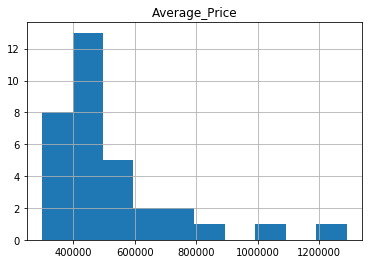

In [45]:
london_merged.hist(column='Average_Price')

Define the ranges of average prices:
> 400 000: 'Low price';
400 000–500 000: 'Middle price';
500 000–600 000: 'Above Middle price';
600 000–800 000: 'High price';
> 800 000: 'Very high price';

In [46]:
london_merged['Level prices'] = np.where(london_merged['Average_Price'] <400000, 'Low price', \
                                (np.where((london_merged['Average_Price'] >= 400000) & (london_merged['Average_Price']<500000), 'Middle price', \
                                 (np.where((london_merged['Average_Price'] >= 500000) & (london_merged['Average_Price']<600000), 'Above Middle price', \
                                   (np.where((london_merged['Average_Price'] >= 600000) & (london_merged['Average_Price']<800000), 'High price', \
                                             'Very high price')))))))

In [47]:
london_merged

Borough   Latitude  Longitude  Average_Price  \
0     Barking and Dagenham  51.546501   0.125051   2.990287e+05   
1                   Barnet  51.605598  -0.207649   5.167502e+05   
2                   Bexley  51.459202   0.136265   3.333173e+05   
3                    Brent  51.551800  -0.257490   4.745404e+05   
4                  Bromley  51.391800   0.026386   4.302424e+05   
5                   Camden  51.534302  -0.143282   8.143753e+05   
6           City of London  51.514301  -0.091442   6.997945e+05   
7                  Croydon  51.368198  -0.096448   3.699863e+05   
8                   Ealing  51.518002  -0.325004   4.597960e+05   
9                  Enfield  51.639900  -0.082636   3.932527e+05   
10               Greenwich  51.476601   0.051824   3.965288e+05   
11                 Hackney  51.549599  -0.069849   5.418023e+05   
12  Hammersmith and Fulham  51.492100  -0.216492   7.187671e+05   
13                Haringey  51.589699  -0.105783   5.115430e+05   
14                  Harrow  51.591801  -0.338094   4.456364e+05   
15                Havering  51.570999   0.203626   3.577700e+05   
16              Hillingdon  51.537800  -0.438400   4.103858e+05   
17                Hounslow  51.471401  -0.347104   3.981704e+05   
18               Islington  51.539001  -0.108697   6.137179e+05   
19  Kensington and Chelsea  51.498501  -0.187347   1.288685e+06   
20    Kingston upon Thames  51.397900  -0.287269   4.678941e+05   
21                 Lambeth  51.457699  -0.120317   4.886103e+05   
22                Lewisham  51.452599  -0.024825   4.066142e+05   
23                  Merton  51.411098  -0.196242   5.021075e+05   
24                  Newham  51.531300   0.030927   3.642919e+05   
25               Redbridge  51.579300   0.066536   4.039113e+05   
26    Richmond upon Thames  51.449001  -0.317008   6.508974e+05   
27               Southwark  51.483601  -0.078522   4.750521e+05   
28                  Sutton  51.364201  -0.181904   3.702000e+05   
29           Tower Hamlets  51.517799  -0.043724   4.478946e+05   
30          Waltham Forest  51.588001  -0.009436   4.331580e+05   
31              Wandsworth  51.455799  -0.176848   5.698327e+05   
32             Westminster  51.513199  -0.148674   9.989116e+05   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                2         Grocery Store                   Pub   
1                5                  Café     Indian Restaurant   
2                1                   Pub         Grocery Store   
3                1           Coffee Shop         Grocery Store   
4                1                   Pub           Coffee Shop   
5                0           Coffee Shop           Zoo Exhibit   
6                0                 Hotel           Coffee Shop   
7                1           Coffee Shop                   Pub   
8                1                  Park           Coffee Shop   
9                1                   Pub           Coffee Shop   
10               1                   Pub         Grocery Store   
11               4                   Pub                  Café   
12               4                   Pub                  Café   
13               5    Turkish Restaurant                  Café   
14               1           Coffee Shop     Indian Restaurant   
15               1           Coffee Shop         Grocery Store   
16               2                   Pub         Grocery Store   
17               1                   Pub     Indian Restaurant   
18               4                   Pub                  Café   
19               0                 Hotel                  Café   
20               4           Coffee Shop                   Pub   
21               3           Coffee Shop                   Pub   
22               4                   Pub           Coffee Shop   
23               1                   Pub     Indian Restaurant   
24               1     Indian Restaurant         Grocery Store   
25               1      

Create choropleth map with level of average prices

In [48]:
# download countries geojson file
!wget --quiet https://github.com/radoi90/housequest-data/raw/master/london_boroughs.geojson -O london.json 

print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [49]:
# create map and display it
london_map = folium.Map(location=[lat, lon], zoom_start=10)
london_geo = r'london.json' # geojson file
london_map.choropleth(
    geo_data=london_geo,
    data=london_merged,
    columns=['Borough', 'Average_Price'],
    key_on='feature.properties.name',
    fill_color = 'YlOrRd', 
    fill_opacity = 0.7, 
    line_opacity=0.2,
    legend_name='Average price in London'
)

# display map
london_map

Add markers about venues to the choropleth map with level of average prices

In [50]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, clustername in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels'], london_merged['Cluster Name']):
    label = folium.Popup(str(poi) + ' : ' + str(clustername), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(london_map)
       
london_map